# Loading our libraries

In [1]:
import cv2 # open cv is our computer vision library of choice
import matplotlib.pyplot as plt # to help us plot image
import numpy as np # for mathematical computation
%matplotlib inline 
# this magic function will help us show images within our notebook

Firstly we want to load our image so that we can use it<br>
<b>P.s</b> Today our focus is solely on playing with images<br>

Let's se how the Google logo looks like<br>
<img src="img/google.png">

In [2]:
google_image = cv2.imread("img/Old-Google-Logo.jpg")

Now lets see how our image looks 

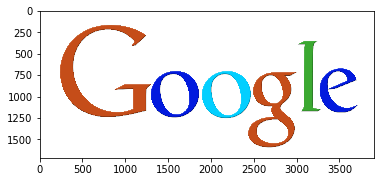

In [3]:
plt.imshow(google_image)

There is something interesting here.<br>
Yes, this is the old Google logo but those are not the colors<br>
<img src="img/color_schemes.png"><br>
We notice cv2 uses BGR instead of the RGB guess Intel had other plans.<br>
Actually we do know RGB was the thing back then now we got to live with it

In [4]:
google_image = cv2.cvtColor(google_image, cv2.COLOR_BGR2RGB)

<ul>
    <li>We just changed the color scheme from BGR to RGB</li>
    <li>we want to check how the logo looks like now</li>
    <li>This time we want to remove the axis labels that we had before</li>
    <li>We will put a title on our image</li>
</ul>

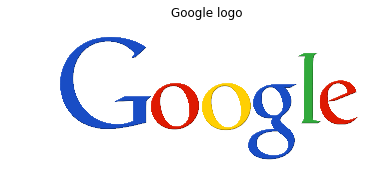

In [5]:
plt.title("Google logo") # putting the title
plt.axis("off") # removing the axis
plt.imshow(google_image) # showing the image

Phew but thats just the tip<br>
<i>Soooo...</i> lets try some other stuff

Let's see it in black and white
<ol>
There are two ways of doing this
    <li>loading in in grayscale </li>
    <li>Converting it grayscale with OpenCV</li>
</ol>

## Converting to grayscale

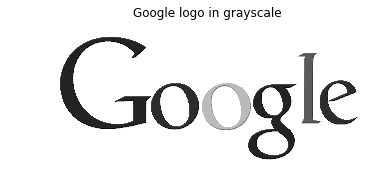

In [6]:
gray_image = cv2.cvtColor(google_image, cv2.COLOR_RGB2GRAY) # convering to grayscale
plt.title("Google logo in grayscale") # putting the title
plt.axis("off") # removing the axis
plt.imshow(gray_image, cmap='gray') # showing the image

## Reading the image in grayscale directly

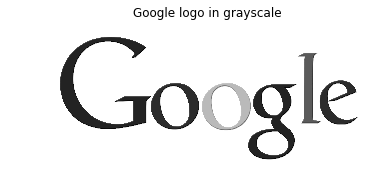

In [7]:
read_in_gray = cv2.imread("img/Old-Google-Logo.jpg", 0)
plt.title("Google logo in grayscale") # putting the title
plt.axis("off") # removing the axis
plt.imshow(read_in_gray, cmap='gray') # showing the image

"""<br>
Just incase you are wondering what <br>
happens when we remove <code>cmap="gray"</code><br>
"""


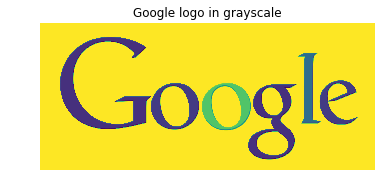

In [8]:
plt.title("Google logo in grayscale") # putting the title
plt.axis("off") # removing the axis
plt.imshow(read_in_gray) # showing the image

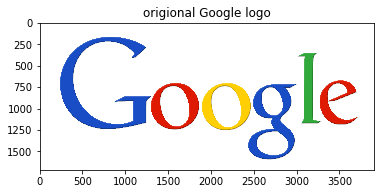

In [9]:
plt.title("origional Google logo")
plt.imshow(google_image) # showing the image

# HSV _(Hue, Saturation, Value)_

Lets look at another colospace<br>
<br>
<b>Hue, Saturation, and Value</b><br>
Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs.<br>
In using this color model, a color is specified then white or black is added to easily make color adjustments.<br>
_HSV may also be called HSB (short for hue, saturation and brightness)._

<b>The HSV Color Space</b><br>
The HSV color space has the following three components
<ul>
    <li>H – Hue ( Dominant Wavelength ).</li>
    <li>S – Saturation ( Purity / shades of the color ).</li>
    <li>V – Value ( Intensity ).</li>
</ul>
Let’s enumerate some of its properties.<br>

Best thing is that it uses only one channel to describe color (H), making it very intuitive to specify color.

In [10]:
# Convert RGB to HSV
hsv_image = cv2.cvtColor(google_image, cv2.COLOR_RGB2HSV)

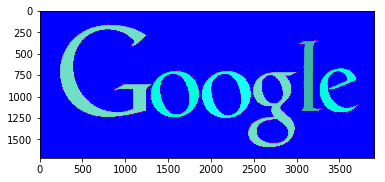

In [11]:
plt.imshow(hsv_image)

We want to segment only the blue color

In [12]:
# define range of blue color in HSV
lower_blue = np.array([110,100,100])
upper_blue = np.array([130,255,255])

In [13]:
# Threshold the HSV image to get only blue colors
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

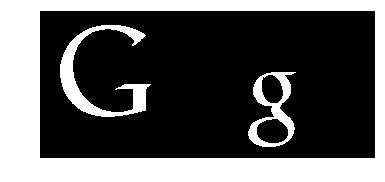

In [14]:
plt.axis("off") # removing the axis
plt.imshow(blue_mask, cmap="gray")

In [15]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(google_image,google_image, mask= blue_mask)

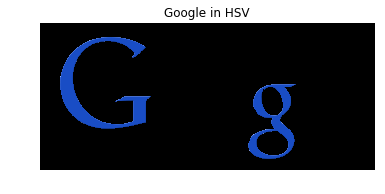

In [16]:
plt.title("Google in HSV") # putting the title
plt.axis("off") # removing the axis
plt.imshow(res)

### To know which color spectrum you need

In [17]:
green = np.uint8([[[0,255,0 ]]])

In [18]:
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)

In [19]:
print("upper value is", hsv_green )

upper value is [[[ 60 255 255]]]


### Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively.

Lets try

In [20]:
# define range of green color in HSV
lower_green = np.array([50,100,100])
upper_green = np.array([70,255,255])

In [21]:
# Threshold the HSV image to get only green colors
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

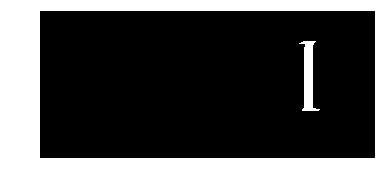

In [22]:
plt.axis("off") # removing the axis
plt.imshow(green_mask, cmap="gray")

In [23]:
# Bitwise-AND mask and original image
res2 = cv2.bitwise_and(google_image,google_image, mask= green_mask)

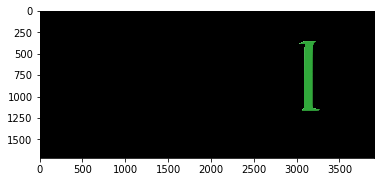

In [24]:
plt.imshow(res2)

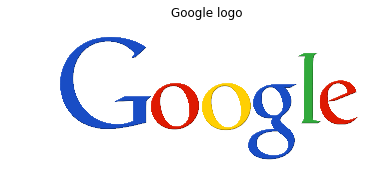

In [25]:
plt.title("Google logo") # putting the title
plt.axis("off") # removing the axis
plt.imshow(google_image) # showing the image

Thats done lets have bounding boxes

In [26]:
# find contours
(_, contours, _) = cv2.findContours(green_mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [27]:
# drawing contours
green_image = cv2.drawContours(google_image, contours, -1, (0, 0, 255), 10)

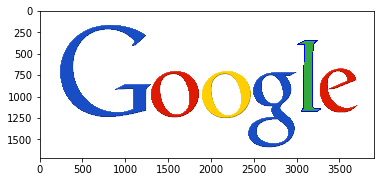

In [28]:
plt.imshow(green_image)

In [29]:
#bounding rectangles
for c in contours:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    re = cv2.rectangle(green_image,(x,y),(x+w,y+h),(0,255,0),10)

drawn = cv2.drawContours(green_image, contours, -1, (255, 0, 255), 10)

plt.imshow(drawn)

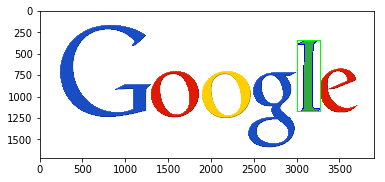

In [30]:
plt.imshow(green_image)

# let's having bounding boxes on red

step [1] read the image

In [31]:
new_image = cv2.imread("img/Old-Google-Logo.jpg")

step[2] convert to the conventional RGB

In [32]:
new_image_RGB = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

step [3] convert to HSV format

In [33]:
# Convert RGB to HSV
red_hsv_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2HSV)

Step [4] get the color space

In [34]:
red = np.uint8([[[255,0,0 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_RGB2HSV)
print('the upper bound is ', hsv_red)

the upper bound is  [[[  0 255 255]]]


In [35]:
# define range of green color in HSV
lower_red = np.array([0,100,100])
upper_red = np.array([10,255,255])

step[5] convert the image to HSV

In [36]:
# Threshold the HSV image to get only red colors
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

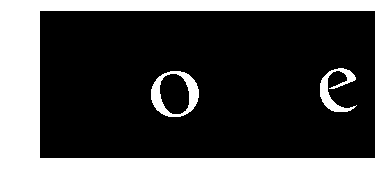

In [37]:
plt.axis("off") # removing the axis
plt.imshow(red_mask, cmap="gray")

Step 6: Find the contours

In [38]:
# find contours
(_, contours, _) = cv2.findContours(red_mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

Step 7: draw bounding rectangle

In [39]:
#bounding rectangles
for c in contours:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    re = cv2.rectangle(new_image_RGB,(x,y),(x+w,y+h),(0,255,0),30)

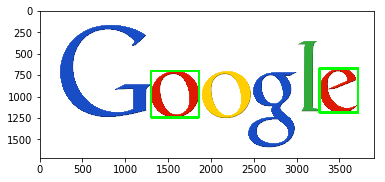

In [40]:
plt.imshow(re)

In [41]:
cv2.imwrite("red_boxed1.png", cv2.cvtColor(re, cv2.COLOR_RGB2BGR))

True